## Introduction
`numpy` is much faster than native Python code relying on loops. The sped up factor can be up to 10 or 100. 




## Example

Let's compare the running speed of native Python and `numpy`. The defined function perform the following operations:

- create a list (or array) fill with `1`, of length `n`
- sum the values of this data container


In [1]:
import numpy as np

def sum_python(n):
    var = [1 for _ in range(n)]
    sum(var)    # Python `sum` is different from 
                # `np.sum`

def sum_numpy(n):
    var = np.ones(n)
    np.sum(var)    

Let's compare running times:

In [2]:
%timeit sum_python(10000)

299 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
%timeit sum_numpy(10000)

9.41 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


The `numpy` implementation is rougly 30 times faster than the Python one for `n=10000`.

## Caution

Every code comes with a constant overhead run time. 

__The use of `numpy` arrays comes with a pretty large overhead that is balanced only for large number of elements__

The code below makes this overhead explicit.

#### Timing

In [ ]:
import pandas as pd

N = np.logspace(1, 8, 8).astype(int)  # n=10, n=100, ..., n=100 000 000
results = []
for n in N:
    timeit_python = %timeit -q -o sum_python(n)
    timeit_numpy = %timeit -q -o sum_numpy(n)
    results.append({'N': n, 
                    'Python': timeit_python.average, 
                    'Numpy': timeit_numpy.average})

In [8]:
df = pd.DataFrame(results).set_index('N')
df

,Python,Numpy
N,,
10,5.945477e-07,0.000004
100,3.047114e-06,0.000005
1000,3.083205e-05,0.000006
10000,3.113286e-04,0.000010
100000,3.114604e-03,0.000049
1000000,3.154092e-02,0.001097
10000000,3.319341e-01,0.015903
100000000,3.358813e+00,0.140852


#### Plotting

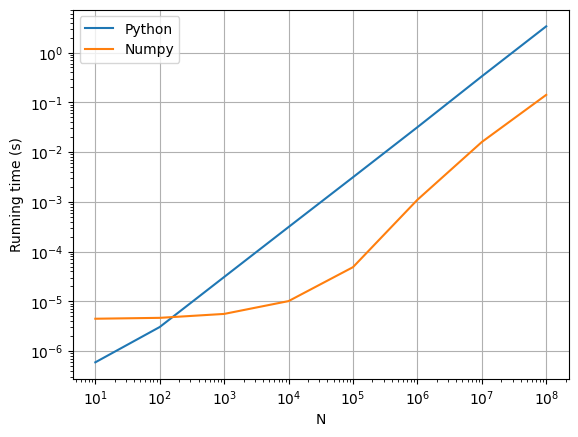

In [9]:
ax = df.plot(logx=True, logy=True, grid=True, ylabel='Running time (s)')

#### Analysis

Regarding the `numpy` version:
 
 - it is 10 to 100 times faster than the Python version, __starting from `n=300`__
 - for $n<300$, the `numpy` running time is constant, which denotes a large overhead of `numpy` operations